In [45]:
import pandas as pd
import re
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import confusion_matrix


In [46]:
df = pd.read_csv("spam_utf8.csv")
df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

df.head()

,label,Text
0,notspam,"Go until jurong point, crazy.. Available only ..."
1,notspam,"Go until jurong point, crazy.. Available only ..."
2,notspam,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,notspam,NaN


In [47]:
#  Number of spam vs non spam emails
num_spam = df[df["label"]=="spam"].shape[0]
num_notspam = df[df["label"]=="notspam"].shape[0]

print(str(num_spam) + " Spam Emails")
print(str(num_notspam) + " Non Spam Emails")

747 Spam Emails
4827 Non Spam Emails


In [48]:
# Missing values count in dataset
missing_values = df["Text"].isnull().sum()
print(str(missing_values) + " missing values")

2 missing values


In [49]:
# number of duplicate values in text column
num_duplicates = df["Text"].duplicated().sum()

print(str(num_duplicates) + " number of duplicate rows")

406 number of duplicate rows


In [50]:
# average length of email
avg_email_length = df['Text'].str.len().mean()
avg_email_length

80.1340631730079

In [51]:
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)
df['Text'] = df['Text'].astype(str)

df.head()

,label,Text
0,notspam,"Go until jurong point, crazy.. Available only ..."
2,notspam,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,notspam,nan
5,notspam,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df['processed_text'] = df['Text'].str.lower()
df['processed_text'] = df['processed_text'].astype(str)

df.head()

,label,Text,processed_text
0,notspam,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
2,notspam,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
4,notspam,nan,nan
5,notspam,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [ ]:
#preprocessing

# remove punctuation
df['processed_text'] = df['processed_text'].str.replace(r'[^\w\s]', '', regex=True)

#remove special characters
df['processed_text'] = df['processed_text'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)

#remove numbers
df['processed_text'] = df['processed_text'].str.replace(r'\d+', '', regex=True)
df.tail()

,label,Text,processed_text
5569,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...
5570,notspam,Will Ì_ b going to esplanade fr home?,will b going to esplanade fr home
5571,notspam,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5572,notspam,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...
5573,notspam,Rofl. Its true to its name,rofl its true to its name


# we remove punctuation, special characters and numbers as it is not valuable for spam classification task


In [54]:
# tokenize words
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['processed_text'] = df['processed_text'].astype(str)
df['processed_text'] = df['processed_text'].apply(word_tokenize)

df.head(50)

[nltk_data] Downloading package punkt_tab to /Users/ahad/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,label,Text,processed_text
0,notspam,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
2,notspam,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
4,notspam,nan,[nan]
5,notspam,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."
6,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, there, darling, its, been, week..."
7,notspam,Even my brother is not like to speak with me. ...,"[even, my, brother, is, not, like, to, speak, ..."
8,notspam,As per your request 'Melle Melle (Oru Minnamin...,"[as, per, your, request, melle, melle, oru, mi..."
9,spam,WINNER!! As a valued network customer you have...,"[winner, as, a, valued, network, customer, you..."
10,spam,Had your mobile 11 months or more? U R entitle...,"[had, your, mobile, months, or, more, u, r, en..."


In [ ]:
# stopwords removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['processed_text'] = df['processed_text'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words])

df.head()

[nltk_data] Downloading package stopwords to /Users/ahad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,Text,processed_text
0,notspam,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
2,notspam,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
4,notspam,nan,[nan]
5,notspam,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


# we remove stop words as stop words add little value for spam classification 

In [56]:
#lemmatization

# we chose lemmatization over stemming as the processing time was worth the wait for higher accuracy a

nlp = spacy.load("en_core_web_sm")

df["processed_text"] = df["processed_text"].apply(
    lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))]  
)

df.head()

,label,Text,processed_text
0,notspam,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
2,notspam,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
4,notspam,nan,[nan]
5,notspam,"Nah I don't think he goes to usf, he lives aro...","[nah, do, not, think, go, usf, life, around, t..."


In [57]:
df["processed_text"] = df["processed_text"].apply(lambda tokens: " ".join(tokens))

#Generate N-grams (Unigrams and Bigrams)
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Generate unigrams and bigrams
ngrams_matrix = vectorizer.fit_transform(df["processed_text"])
ngrams_df = pd.DataFrame(ngrams_matrix.toarray(), columns=vectorizer.get_feature_names_out())

ngrams_df

,aa,aa exhaust,aah,aah bless,aah cuddle,aah speak,aaniye,aaniye pudunga,aaooooright,aaooooright work,...,zogtorius,zogtorius ve,zoom,zoom cine,zouk,zouk nichols,zs,zs subscription,zyada,zyada kisi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# The reason why I chose N-grams for the feature engineering step of this process is because it seemed most appropriate for this task. Mainly because N-grams can be used to capture contexts and semantics. In this case, unigrams and bigrams are used, words that are alone or 2 words that are together can be captured. This will help the model in finding unigram patterns in spam emails such as "free entry". 

In [58]:
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["processed_text"], 
    df["label"], 
    test_size=0.2, 
    random_state=42
)

X_train = vectorizer.fit_transform(X_train_text)

X_test = vectorizer.transform(X_test_text)


print(X_train,X_test,y_train,y_test)

  (0, 23238)	1
  (0, 16731)	1
  (0, 24691)	1
  (0, 26289)	1
  (0, 6312)	1
  (0, 17559)	1
  (0, 29407)	1
  (0, 4383)	1
  (0, 959)	1
  (0, 23239)	1
  (0, 16747)	1
  (0, 24692)	1
  (0, 26309)	1
  (0, 6323)	1
  (0, 17783)	1
  (0, 29411)	1
  (0, 4392)	1
  (1, 7718)	1
  (2, 8492)	1
  (2, 28078)	1
  (2, 3358)	1
  (2, 19210)	1
  (2, 10552)	1
  (2, 20136)	1
  (2, 13973)	1
  :	:
  (4132, 10182)	1
  (4132, 18480)	1
  (4132, 290)	1
  (4132, 5548)	1
  (4132, 386)	1
  (4133, 27192)	1
  (4133, 595)	1
  (4133, 6464)	1
  (4133, 18999)	1
  (4133, 4326)	1
  (4133, 10141)	1
  (4133, 4753)	2
  (4133, 21175)	1
  (4133, 11713)	1
  (4133, 16768)	1
  (4133, 21176)	1
  (4133, 6467)	1
  (4133, 4754)	1
  (4133, 620)	1
  (4133, 19006)	1
  (4133, 10143)	1
  (4133, 11714)	1
  (4133, 16769)	1
  (4133, 27193)	1
  (4133, 4330)	1   (0, 2883)	1
  (0, 3516)	1
  (0, 6125)	1
  (0, 8994)	1
  (0, 9100)	1
  (0, 9208)	1
  (0, 9653)	2
  (0, 9808)	1
  (0, 9867)	1
  (0, 10411)	1
  (0, 10425)	1
  (0, 14998)	1
  (0, 15062)	1
  (0, 1

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1',                     
    C = 0.2, 
    solver='liblinear',   
    random_state=42 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model)


LogisticRegression(C=0.2, penalty='l1', random_state=42, solver='liblinear')


# The reason why I chose Logistic Regression for the model selection part is because it widely known for binary classification tasks such as this one. Logistic Regression is also able to handle sparse data such as the ngrams_df that was generated for feature engineering. Finally, Logistic Regression is a simple model that is easy to interpret and performs well, given a 96% accuracy score. Prior to experimenting with the hyperparameter, regularization and solver parameters, the model performed with an accuracy of 92%.

# 

In [66]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9642


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     notspam       0.97      0.99      0.98       915
        spam       0.94      0.74      0.83       119

    accuracy                           0.96      1034
   macro avg       0.95      0.87      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [68]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

print(report_df)




              precision    recall  f1-score      support
notspam        0.967021  0.993443  0.980054   915.000000
spam           0.936170  0.739496  0.826291   119.000000
accuracy       0.964217  0.964217  0.964217     0.964217
macro avg      0.951596  0.866469  0.903172  1034.000000
weighted avg   0.963471  0.964217  0.962358  1034.000000


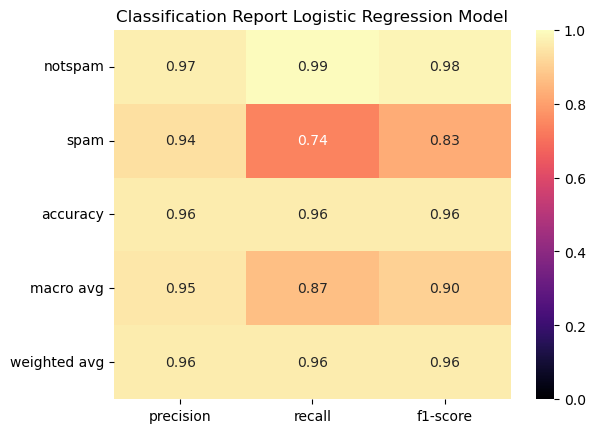

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(
    report_df[['precision', 'recall', 'f1-score']], 
    annot=True, 
    cmap='magma', 
    vmin=0, vmax=1, 
    fmt='.2f'
)
plt.title("Classification Report Logistic Regression Model")
plt.show()


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[909   6]
 [ 31  88]]


In [27]:
stopwords = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")
def custom_preprocess(text):
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    text = re.sub(r'\d+', '', text)
    
    tokens = text.split()
    
    doc = nlp(" ".join(tokens))
    
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    
    return " ".join(tokens)



In [28]:
new_text = "you have won a free trip to the bahamas!"
new_text = custom_preprocess(new_text) 

print(new_text)

win free trip bahama


In [29]:
X_new = vectorizer.transform([new_text])

prediction = logreg.predict(X_new)

print(prediction)  


['spam']


In [30]:
# TF-IDF 

vectorizer_tfidf = TfidfVectorizer()

tfidf_matrix = vectorizer_tfidf.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
tfidf_df

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# SVM

X = tfidf_df
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna("")
X_test = X_test.fillna("")

model = SVC()
%time model.fit(X_train, y_train)

%time predictions = model.predict(X_test)

#print("Train Accuracy:", model.score(X_train_vectorized, predictions))
#print("Test Accuracy:", model.score(X_test_vectorized, predictions))
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print(f"Accuracy Score: {accuracy_score(y_test, predictions):.2f}")

CPU times: user 50.6 s, sys: 224 ms, total: 50.8 s
Wall time: 51.7 s
CPU times: user 18.9 s, sys: 42 ms, total: 18.9 s
Wall time: 19.1 s
Train Accuracy: 0.9966134494436382
Test Accuracy: 0.9690522243713733
Classification Report:
              precision    recall  f1-score   support

     notspam       0.97      1.00      0.98       915
        spam       0.99      0.74      0.85       119

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.97      0.97      1034

Accuracy Score: 0.97


In [32]:
#Confusion Matrix 

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[914   1]
 [ 31  88]]


In [33]:
new_text = 'congratulation win free trip japan'
X_new = vectorizer_tfidf.transform([new_text])

X_new_dense = X_new.toarray()

prediction = model.predict(X_new_dense)

print(prediction) 

['spam']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
